In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)

# 그래디언트 부스팅

## (1) 데이터 구성하기 (목표변수, 설명변수) 

In [2]:
df_raw=pd.read_csv("/Users/lee/Week3/체질검사.csv",engine="python",encoding='cp949')

## (2) 데이터 분할하기

In [3]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT",axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

In [4]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Score on training set : 0.956
Score on test set : 0.612


## (3) Parameter = n_estimators

In [5]:
train_score=[];test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimatros"]=para_n_tree
df_score_n["Trainscore"]=train_score
df_score_n["TestScore"]=test_score

In [6]:
df_score_n.round(3)

,n_estimatros,Trainscore,TestScore
0,10,0.936,0.542
1,20,0.946,0.597
2,30,0.952,0.610
3,40,0.955,0.609
4,50,0.955,0.611
5,60,0.956,0.616
6,70,0.955,0.614
7,80,0.955,0.611
8,90,0.956,0.610
9,100,0.956,0.612


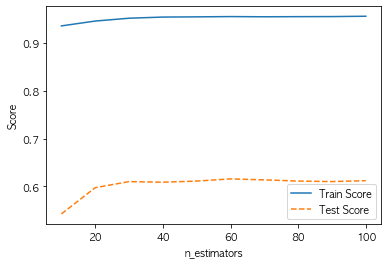

In [7]:
plt.plot(para_n_tree,train_score,linestyle='-',label="Train Score")
plt.plot(para_n_tree,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("n_estimators")
plt.legend()

## (4) Parameter = min_samples_leaf

In [8]:
train_score=[];test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(min_samples_leaf=v_min_samples_leaf,n_estimators=100,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["Min Samples Leaf"]=para_leaf
df_score_leaf["Trainscore"]=train_score
df_score_leaf["TestScore"]=test_score

In [9]:
df_score_leaf.round(3)

,Min Samples Leaf,Trainscore,TestScore
0,1,0.956,0.612
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


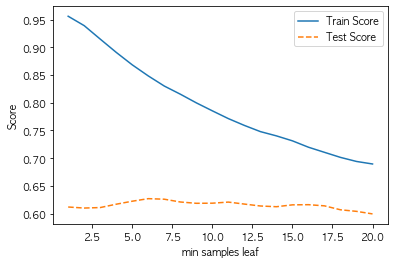

In [10]:
plt.plot(para_leaf,train_score,linestyle='-',label="Train Score")
plt.plot(para_leaf,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("min samples leaf")
plt.legend()

## (5) Parameter = min_samples_split

In [11]:
train_score=[];test_score=[]
para_split=[n_split*1 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(min_samples_split=v_min_samples_split,n_estimators=100,random_state=1234,min_samples_leaf=6)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_split = pd.DataFrame()
df_score_split["Min Samples split"]=para_split
df_score_split["Trainscore"]=train_score
df_score_split["TestScore"]=test_score

In [12]:
df_score_split.round(3)

,Min Samples split,Trainscore,TestScore
0,2,0.849,0.627
1,3,0.849,0.627
2,4,0.849,0.627
3,5,0.849,0.627
4,6,0.849,0.627
5,7,0.849,0.627
6,8,0.849,0.627
7,9,0.849,0.627
8,10,0.849,0.627
9,11,0.849,0.627


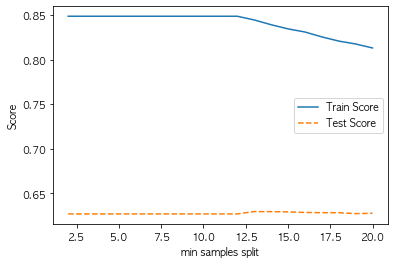

In [13]:
plt.plot(para_split,train_score,linestyle='-',label="Train Score")
plt.plot(para_split,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("min samples split")
plt.legend()

## (6) Parameter = max_depth

In [14]:
train_score=[];test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(max_depth=v_max_depth,min_samples_split=14,n_estimators=100,random_state=1234,min_samples_leaf=6)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Min Samples depth"]=para_depth
df_score_depth["Trainscore"]=train_score
df_score_depth["TestScore"]=test_score

In [15]:
df_score_depth.round(3)

,Min Samples depth,Trainscore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


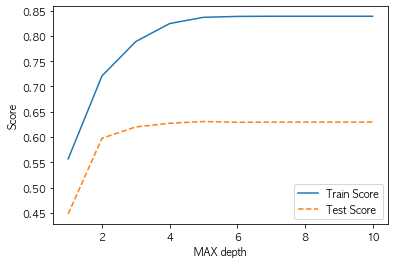

In [16]:
plt.plot(para_depth,train_score,linestyle='-',label="Train Score")
plt.plot(para_depth,test_score,linestyle='--',label="Test Score")
plt.ylabel("Score");plt.xlabel("MAX depth")
plt.legend()

## (7) 최종모델선정

In [17]:
rf_final = RandomForestRegressor(random_state=1234,n_estimators=30,min_samples_leaf=11,
                                    min_samples_split=22,max_depth=4)
rf_final.fit(df_train_x,df_train_y)

print("Score on training set : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set : 0.767
Score on test set : 0.621


## (8) 최종 모델 트리 시각화 및 해석

In [18]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.894
4,CHEST,0.042
2,HEIGHT,0.018
3,NECK,0.015
0,AGE,0.007
12,WRIST,0.007
7,THIGH,0.005
6,HIP,0.003
9,ANKLE,0.002
1,WEIGHT,0.002


## (9) 설명변수 중요도

Text(0, 0.5, '변수')

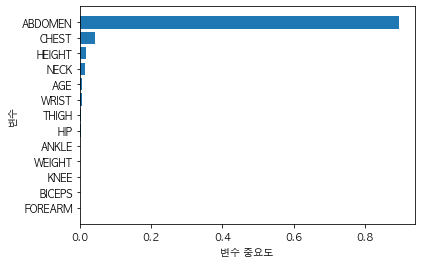

In [19]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## (10) GridsearchCV 최적 Parameter 찾기

In [20]:
# estimator=RandomForestRegressor(random_state=1234)

# param_grid={"criterion":["mse","friedman_mse","mae"],"max_features":["auto","sqrt","log2"],max_depth":para_depth,"min_sample_leaf":para_leaf}
# grid_rf=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
# grid_rf.fit(df_train_x,df_train_y)

# print('best Estimator model:\n{}'.format(grid_gb.best_estimator_))
# print('\nbest parameter:\n{}'.format(grid_gb.best_params_))
# print('\nbest best score:\n{}'.format(grid_gb.best_score_.round(3)))